In [2]:
# style the notebook
from IPython.core.display import HTML
import urllib.request
response = urllib.request.urlopen('http://bit.ly/1LC7EI7')
HTML(response.read().decode("utf-8"))

# Background Detection with Gaussians

First, an important disclaimer - this is not a good algorithm for this problem. I use it merely to indroduce the idea of using probabilities in image detection. The algorithm will trivially fail, which I will demonstrate at the end. but, once you understand the concepts they can be applied in more sophisticated algorithms. There's a lot of material to understand for a modern algorithm. If you don't have a thorough grasp of the material you'd still probably understand the explanation, but be unable to understand the limitations or apply it to your own problem. 

We will try to identify pool (billiard) balls on a table by learning what the background looks like. The background is the table felt, normally green. This is our first simplification - that the background is green and somewhat uniform. 

First, let's pull in and display an image using Pillow. I do not aim to teach Pillow here; a great (and official) guide is here: http://pillow.readthedocs.org/guides.html. I will only use a few features, and you should be able to understand everything I do just by inspecting the code.

In [3]:
%matplotlib inline
from PIL import Image
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = 8, 8

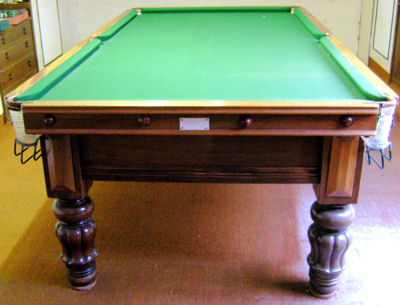

In [4]:
table = Image.open('empty-table.jpg')
table

There is too much in that image to process easily. Since this is a toy example, I've just cut a close up out of that image, and we will use that to learn the background.

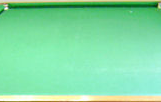

In [5]:
closeup = Image.open('empty-closeup.png')
closeup

My hypothesis is simple. I can represent the background (the table felt) as a Gaussian of the pixel colors of this image. I can then use this Gaussian on other images of tables with balls on them. Pixels that are 'far' from this learned Gaussians are balls (or sticks, or people), those that are close are the felt. In this way I can easily extract the balls from the image.

Difficulties should already suggest themselves. Can we detect green balls? What if the table felt is blue, or dimly lit? What if the image is overexposed, making the felt near white? What if there is a strong light to the side, causing the balls to cast shadows? But let's ignore them, and just learn how to perform this task.

Here we inspect the attributes of the image:

In [6]:
print(closeup.format, closeup.size, closeup.mode)

PNG (161, 102) RGB


It is possible to compute the Gaussian of an RGB value in a couple of ways. We can treat the (R, G, B) tuple as a 24 bit value, or we could independently compute the 

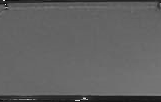

In [7]:
hsv = closeup.convert('HSV')
hue, sat, value = hsv.split()
hue

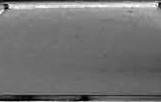

In [8]:
sat

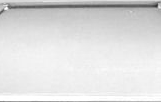

In [9]:
value

In [10]:
hue = np.array(hue).flatten()
hue[0]

40

In [11]:
mean = np.mean(hue)
std = np.std(hue)
print(mean, std)

97.5240530995 19.5328776404


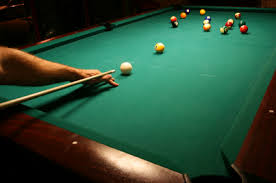

In [12]:
table1 = Image.open('table1.jpg')
table1

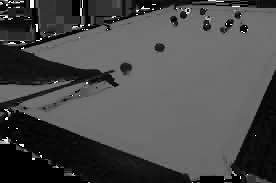

In [13]:
hsv = table1.convert('HSV')
hue, sat, value = hsv.split()
hue

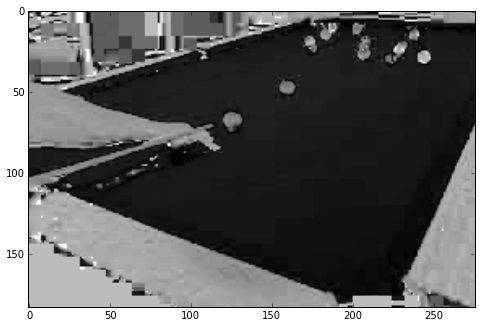

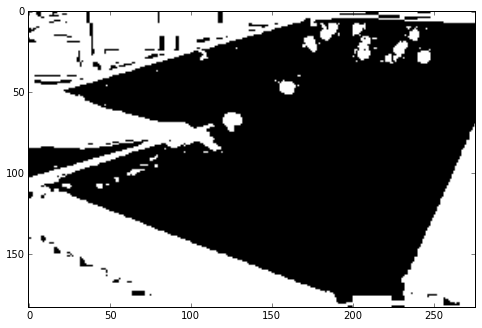

In [14]:
import matplotlib.cm as cm
diff = abs(hue - mean)
match = diff>1.4*std


plt.imshow(abs(hue - mean), cmap=cm.Greys_r)
plt.show()
plt.imshow(match, cmap=cm.Greys_r);

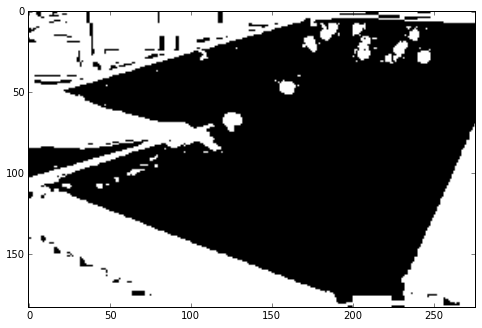

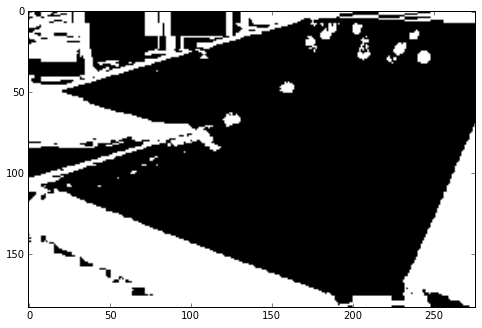

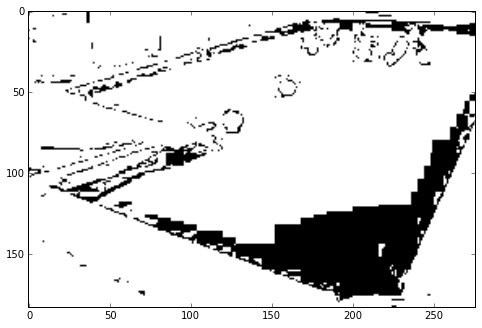

In [15]:
def extract_background(image, mean, std, window):
    hsv = image.convert('HSV')
    hue, sat, value = hsv.split()
    diff = abs(hue - mean)
    match = diff > window * std
    plt.imshow(match, cmap=cm.Greys_r)
    plt.show()
    

extract_background(Image.open('table1.jpg'), mean, std, 1.4)
extract_background(Image.open('table1.jpg'), mean, std, 3)
extract_background(Image.open('table1.jpg'), mean, std, .5)